<a href="https://colab.research.google.com/github/danlee65071/DSFromScratch/blob/main/Lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 3

## Предыдущий материал

1. Формула линейной регрессии?
2. Формула MSE?
3. Минусы аналитического метода?
4. Отличие стохастического градиентного спуска от приближенного метода?

## Ответы

1. $f_{w}(x_{i})=⟨w,x_{i}⟩$
2. $MSE(f,X,y)=\frac{1}{N}|y-Xw|_{2}^{2}$
3. Вычислительно сложно обращать матрицы, хранение в памяти большого количества информации за раз.
4. В SGD мы делим датасет на батчи, что позволяет хранить в памяти не весь датасет, но шаги SGD более шумные.

## Регуляризация

### Описание проблемы:

Всегда ли решение задачи регрессии единственно? (нет). Если в выборке два признака будут линейно зависимы (и следовательно, ранг матрицы будет меньше 
$D$ - число признаков), то гарантировано найдётся такой вектор весов $v$ что $⟨v,x_{i}⟩=0, ∀x_{i}$
. В этом случае, если какой-то $w$ является решением оптимизационной задачи, то и $w+αv$ тоже является решением для любого $α$. То есть решение не только не обязано быть уникальным, так ещё может быть сколь угодно большим по модулю. Это создаёт вычислительные трудности. Малые погрешности признаков сильно возрастают при предсказании ответа, а в градиентном спуске накапливается погрешность из-за операций со слишком большими числами.

Редко бывает так, что признаки строго линейно зависимы, а вот быть приближённо линейно зависимыми они могут быть. Такая ситуация называется **мультиколлинеарностью**. Дело в том, что $Xv≈0$
 для вектора $v$
, состоящего из коэффициентов приближённой линейной зависимости, и,  соответственно, $X^{T}Xv≈0$
, то есть матрица $X^{T}X$
 снова будет близка к вырожденной.

 Для того, чтобы справиться с этой проблемой, задачу обычно **регуляризуют**, то есть добавляют к ней дополнительное ограничение на вектор весов. Это ограничение можно, как и исходный лосс, задавать по-разному, но, как правило, ничего сложнее, чем 
$L^{1}$- и 
$L^{2}$-нормы, не требуется.

Вместо исходной задачи теперь предлагается решить такую:

$\displaystyle \min_{w}L(f, X, y) = \displaystyle \min_{w}(|Xw-y|^{2}_{2}+λ|w|^{k}_{k})$

Добавка $λ|w|^{k}_{k}$
 называется регуляризационным членом или регуляризатором, а число $λ$
 – коэффициентом регуляризации.

 $|w|^{1}_{1}=|w_{1}|+...+|w_{D}|$ - $L^{1}$ лосс,

 $|w|^{2}_{2}=w_{1}^{2}+...+w_{D}^{2}$ - $L^{2}$ лосс.


 Коэффициент $\lambda$
 является гиперпараметром модели и достаточно сильно влияет на качество итогового решения. Его подбирают по логарифмической шкале (скажем, от 1e-2 до 1e+2).


 В случае $L^{2}$
-регуляризации решение задачи изменяется не очень сильно.

$L(f,X,y)=|Xw-y|^{2}_{2}+λ|w|^{2}_{2}$

$∇_{w}L(f,X,y)=2X^{T}|Xw-y|+2λw$

$2X^{T}(Xw-y)+2λw=0$

$w=(X^{T}X+λI)^{-1}X^{T}y$

$L^{2}$-регуляризация работает прекрасно и используется в большинстве случаев, но есть одна полезная особенность $L^{1}$
-регуляризации: её применение приводит к тому, что у признаков, которые не оказывают большого влияния на ответ, вес в результате оптимизации получается равным 0
. Это позволяет удобным образом удалять признаки, слабо влияющие на таргет. Кроме того, это даёт возможность автоматически избавляться от признаков, которые участвуют в соотношениях приближённой линейной зависимости.


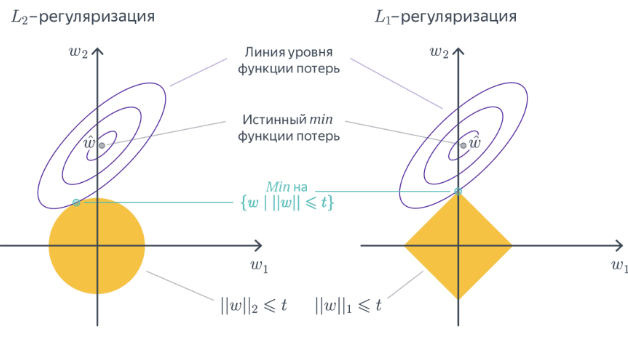


## Другие лоссы

### MAE

Mean absolute error, абсолютная ошибка, появляется при замене $L^{2}$
 нормы в MSE на $L^{1}$
:

$MAE(y,\hat{y})=\frac{1}{N}∑^{N}_{i=1}|y_{i}-\hat{y}_{i}|$

В MAE по сравнению с MSE существенно меньший вклад в ошибку будут вносить примеры, сильно удалённые от ответов модели. Дело тут в том, что в MAE мы считаем модуль расстояния, а не квадрат, соответственно, вклад больших ошибок в MSE получается существенно больше. Такая функция потерь уместна в случаях, когда вы пытаетесь обучить регрессию на данных с большим количеством выбросов в таргете.

### MAPE

Mean absolute percentage error, относительная ошибка.

$MAPE(y,\hat{y})=\frac{1}{N}∑_{i=1}^{N}|\frac{y_{i}-\hat{y}_{i}}{y_{i}}|$

Часто используется в задачах прогнозирования (например, погоды, загруженности дорог, кассовых сборов фильмов, цен), когда ответы могут быть различными по порядку величины, и при этом мы бы хотели верно угадать порядок, то есть мы не хотим штрафовать модель за предсказание 2000 вместо 1000 в разы сильней, чем за предсказание 2 вместо 1.

In [1]:
import pandas as pd
import numpy as np

In [2]:
class MyLassoRegression():
    def __init__(self, learning_rate, iterations, l1_penality) :
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penality = l1_penality

    def fit(self, X, Y) :
        self.m, self.n = X.shape
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.Y = Y
        for i in range(self.iterations):
            self.update_weights()
        return self

    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW = np.zeros(self.n)
        for j in range(self.n):
            dW[j] = (-(2 * (self.X[:, j]).dot(self.Y - Y_pred)) 
                        + self.l1_penality ) / self.m
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        return self

    def predict(self, X):
        return X.dot(self.W) + self.b

## Линейная классификация

Для начала будем говорить про бинарную классификацию на два класса. Обобщить эту задачу до задачи классификации на $K$ классов не составит большого труда.

Пусть теперь наши таргеты $y$ кодируют принадлежность к положительному или отрицательному классу, то есть принадлежность множеству $(-1, 1)$ (в этой главе договоримся именно так обозначать классы, хотя в жизни вам будут нередко встречаться и метки $(0, 1)$), а $x$ – по-прежнему векторы из $ℝ^{D}$.
Мы хотим обучить линейную модель так, чтобы плоскость, которую она задаёт, как можно лучше отделяла объекты одного класса от другого.
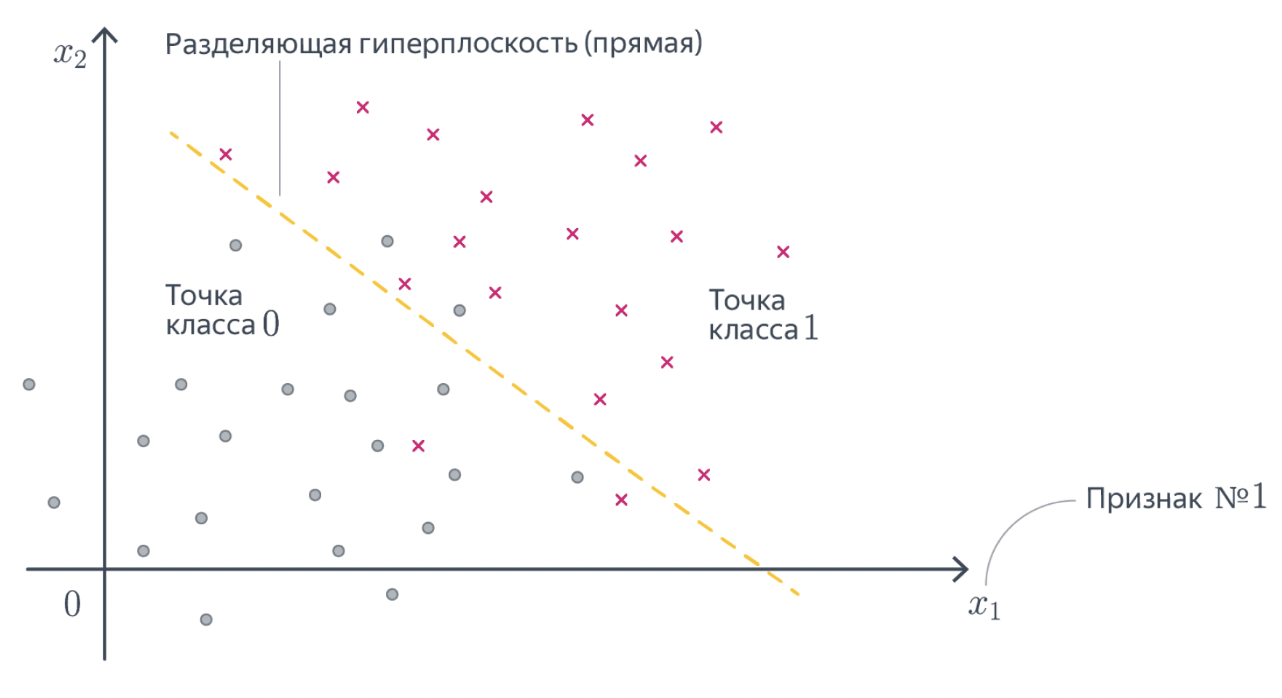

Выборка, для которой это возможно, называется **линейно разделимой**.
Итоговое предсказание можно будет вычислить по формуле:


$y=sign(<ω, x_{i}>)$


Мы хотим минимизировать число ошибок классификатора, то есть:


$∑_{i}=𝕀[y_{i}\neq sign(<ω, x_{i}>)]⟶\underset{w}{min}$


Домножим обе части на $y_{i}$:

$∑_{i}=𝕀[y_{i}^{2}\neq y_{i}*sign(<ω, x_{i}>)]⟶\underset{w}{min}$

$∑_{i}=𝕀[y_{i}(<ω, x_{i}>) < 0]⟶\underset{w}{min}$


Величина $M=y_{i}(<ω, x_{i}>)$ называется отступом (margin) классификатора. Такая фунция потерь называется misclassification loss. Легко видеть, что:

- отступ положителен, когда  $sign(y_{i})=sign(<w, x_{i}>)$, то есть класс угадан верно; при этом чем больше отступ, тем больше расстояние от 
 до разделяющей гиперплоскости, то есть «уверенность классификатора»;

- отступ отрицателен, когда $sign(y_{i})\neq sign(<w, x_{i}>)$, то есть класс угадан неверно; при этом чем больше по модулю отступ, тем более сокрушительно ошибается классификатор.

## Логистическая регрессия

В этом параграфе мы будем обозначать классы нулём и единицей.
Вероятность, по определению, величина от 0 до 1, а простого способа обучить линейную модель так, чтобы это ограничение соблюдалось, нет. Из этой ситуации можно выйти так: научить линейную модель правильно предсказывать какой-то объект, связанный с вероятностью, но с диапазоном значений $(-∞, +∞)$, и преобразовать ответы модели в вероятность. Таким объектом является logit или log odds – логарифм отношения вероятности положительного события к отрицательному $log(\frac{p}{1-p})$.


Если ответом нашей модели является $log(\frac{p}{1-p})$, то искомую вероятность посчитать не трудно:

$<w,x_{i}>=log(\frac{p}{1-p})$

$e^{<w,x_{i}>}=\frac{p}{1-p}$

$p=\frac{1}{1+e^{-<w,x_{i}>}}$

Функция в правой части называется сигмоидой и обозначается:

$σ(z)=\frac{1}{1+e^{-z}}$

Как теперь научиться оптимизировать $w$ так, чтобы модель как можно лучше предсказывала логиты? Нужно применить метод максимума правдоподобия для распределения Бернулли. Это самое простое распределение, которое возникает, к примеру, при бросках монетки, которая орлом выпадает с вероятностью $p$.

Правдоподобие позволяет понять, насколько вероятно получить данные значения таргета $y$ при данных $X$ и весах $w$. Оно имеет вид:

$p(y|X,w)=\underset{i}{∏}p(y_{i}|x_{i},w)$

и для распределения Бернулли его можно выписать следующим образом:

$p(y|X,w)=\underset{i}{∏}p_{i}^{y_{i}}(1-p_{i})^{1-y_{i}}$

где $p_{i}$ – это вероятность, посчитанная из ответов модели.

Оптимизировать произведение неудобно, хочется иметь дело с суммой, так что мы перейдём к логарифмическому правдоподобию и подставим формулу для вероятности, которую мы получили выше:

$l(<w,X, y>)=\underset{i}{∑}(y_{i}log(p_{i})+(1-y_{i})log(1-p_{i}))$

$l(<w,X, y>)=\underset{i}{∑}(y_{i}log(\sigma(<w,x_{i}>))+(1-y_{i})log(1-\sigma(<w,x_{i}>)))$

$σ(<w,x_{i}>)=\frac{1}{1+e^{<w,x_{i}>}}$

$1 - σ(<w,x_{i}>)=1 - \frac{1}{1+e^{<w,x_{i}>}}= \frac{1+e^{<w,x_{i}>}-1}{1+e^{<w,x_{i}>}}=\frac{e^{<w,x_{i}>}}{1+e^{<w,x_{i}>}}=\frac{1/e^{-<w,x_{i}>}}{1+1/e^{-<w,x_{i}>}}=\frac{1/e^{-<w,x_{i}>}}{(e^{-<w,x_{i}>}+1)/e^{-<w,x_{i}>}}=\frac{1}{1+e^{-<w,x_{i}>}}=σ(-<w,x_{i}>)$

$l(<w,X, y>)=\underset{i}{∑}(y_{i}log(\sigma(<w,x_{i}>))+(1-y_{i})log(\sigma(-<w,x_{i}>)))$

Нас интересует $w$, для которого правдоподобие максимально. Чтобы получить функцию потерь, которую мы будем минимизировать, умножим его на минус один:

$L(<w,X, y>)=-\underset{i}{∑}(y_{i}log(\sigma(<w,x_{i}>))+(1-y_{i})log(\sigma(-<w,x_{i}>)))$

В отличие от линейной регрессии, для логистической нет явной формулы решения.

$∇_{w}L(w,X,y)=-\underset{i}{∑}x_{i}(y_{i}-σ(<w,x_{i}>))$

In [ ]:
class MyLogisticRegression:
    def __init__(self, threshold=0.5):
        self.threshold = threshold

    @staticmethod
    def sigmoid(z):
        return 1/(1 + np.exp(z))

    def fit(self, X, y, epochs=50, batch_size=16):
        pass


    def predict(self, X):
        pass